In [2]:
import xgboost as xgb ## XGBoost 불러오기(파이썬 래퍼 모듈)
from xgboost import plot_importance
from sklearn.metrics import classification_report

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
import pandas as pd
import numpy as np

In [66]:
from tensorflow.keras.layers import *

In [67]:
from tensorflow.keras.models import *

In [68]:
from tensorflow.keras.utils import *

In [69]:
from sklearn.preprocessing import *

In [70]:
from sklearn.svm import SVC

In [71]:
import os

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [73]:
import matplotlib.pyplot as plt

In [74]:
from tensorflow.keras.callbacks import EarlyStopping

In [75]:
import joblib

In [76]:
from tensorflow.keras.models import load_model

In [77]:
for dirname, _, filenames in os.walk('C:\Project_AI'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

C:\Project_AI\SCI_XGB_model1_1.json
C:\Project_AI\SCI_XGB_model1_2.txt
C:\Project_AI\SCI_XGB_model2_1.json
C:\Project_AI\SCI_XGB_model2_2.txt
C:\Project_AI\SCI_XGB_model3_1.json
C:\Project_AI\SCI_XGB_model3_2.txt
C:\Project_AI\SCI_XGB_model4_1.json
C:\Project_AI\SCI_XGB_model4_2.txt


In [78]:
train = pd.read_csv('10class_ensemble_dataset.csv', header=None)

train = train.to_numpy()

In [79]:
# train X, train y 분리
# csv 파일의 1~33 / 34 column 분리
X = train[:,0:34]
y = train[:,34:35]

In [80]:
# datatype 변경
X = X.astype('float32')   
y = y.astype('float32')

In [81]:
# train, test 분리
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.1)

In [82]:
# (행 갯수, 열 갯수)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20235, 34)
(20235, 1)
(2249, 34)
(2249, 1)


In [83]:
# 학습용 데이터에 라벨(정답) 부착
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [84]:
# 배열에 차원 추가
X_train1 = np.expand_dims(X_train, 2)
X_test1 = np.expand_dims(X_test, 2)

In [85]:
# to_categorical = One-hot 인코딩을 해주는 함수
# 10진 정수 형식을 특수한 2진 바이너리 형식으로 변경함
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

In [86]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(20235, 34, 1)
(2249, 34, 1)
(20235, 10)
(2249, 10)


In [87]:
# xgboost model parameter settings
# max_dpth : 깊이 / 10
# booster : 모델 유형(트리 기반 모델, 선형 모델) / 트리 기반 모델
# eta : learning rate / GBM에서의 학습 속도와 유사, 각 단계에서 가중치를 줄임으로써 모델을 더 강건하게 만듦
# n_gpus : GPU 사용 설정(0은 사용 X)
# objective : 지도학습 손실 최소화 함수를 정의 / 이항 분류에서는 binary:logistic, 다항 분류에서는 multi:softmax를 사용
xgb_params = {'max_depth' : 8,
         'booster' : 'gbtree', 
         'eta' : 0.1,
         'objective' : 'multi:softprob',
         'num_class': 10,
         'eval_metric' : 'mlogloss'}

num_rounds = 10000

In [88]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
# 총 데이터 셋
wlist = [(dtrain, 'train'), (dtest,'eval')]

In [89]:
# num_boost_round
# evals = 
xgb_model = xgb.train(params = xgb_params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=10, evals=wlist)

[0]	train-mlogloss:1.99577	eval-mlogloss:2.02284
[1]	train-mlogloss:1.77394	eval-mlogloss:1.82555
[2]	train-mlogloss:1.60377	eval-mlogloss:1.67338
[3]	train-mlogloss:1.46410	eval-mlogloss:1.54627
[4]	train-mlogloss:1.34316	eval-mlogloss:1.43690
[5]	train-mlogloss:1.24290	eval-mlogloss:1.34569
[6]	train-mlogloss:1.15180	eval-mlogloss:1.26280
[7]	train-mlogloss:1.07334	eval-mlogloss:1.19106
[8]	train-mlogloss:0.99948	eval-mlogloss:1.12480
[9]	train-mlogloss:0.93202	eval-mlogloss:1.06401
[10]	train-mlogloss:0.87229	eval-mlogloss:1.01000
[11]	train-mlogloss:0.81659	eval-mlogloss:0.95953
[12]	train-mlogloss:0.76426	eval-mlogloss:0.91182
[13]	train-mlogloss:0.71779	eval-mlogloss:0.86918
[14]	train-mlogloss:0.67352	eval-mlogloss:0.82829
[15]	train-mlogloss:0.63310	eval-mlogloss:0.79079
[16]	train-mlogloss:0.59600	eval-mlogloss:0.75591
[17]	train-mlogloss:0.56334	eval-mlogloss:0.72543
[18]	train-mlogloss:0.53134	eval-mlogloss:0.69493
[19]	train-mlogloss:0.50171	eval-mlogloss:0.66671
[20]	train

In [90]:
xgb_model.save_model("C:/Project_AI/SCI_XGB_model5_1.json")
xgb_model.save_model("C:/Project_AI/SCI_XGB_model5_2.txt")

In [91]:
pred = xgb_model.predict(dtest)
#XGBoost_pred_probs = SCI_XGB_model.predict(dtest)

In [92]:
cnf_matrix = confusion_matrix(y_test1.argmax(axis=1), pred.argmax(axis=1))
#cnf_matrix = confusion_matrix(y_test1.argmax(axis=1), XGBoost_pred_probs.argmax(axis=1))
np.set_printoptions(precision=2)

In [93]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


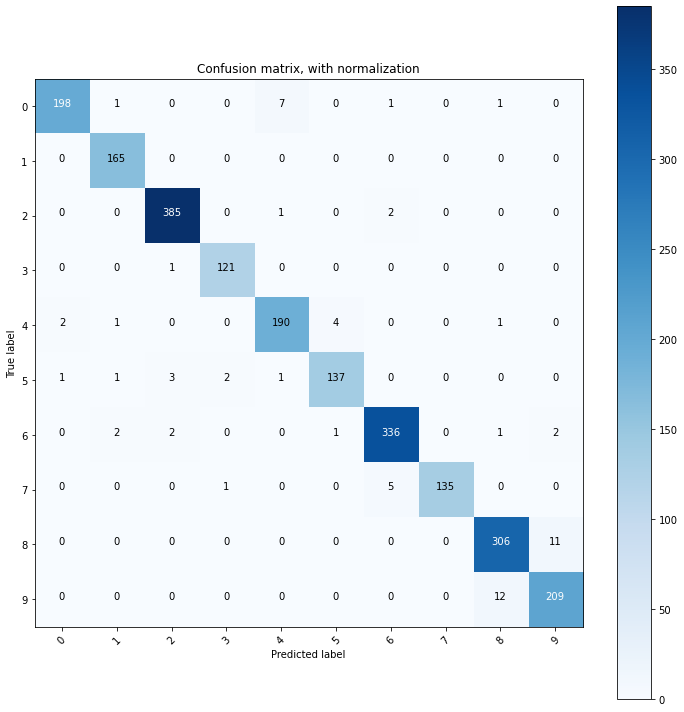

In [94]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3','4','5','6','7','8','9'],normalize=False,
                      title='Confusion matrix, with normalization')
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

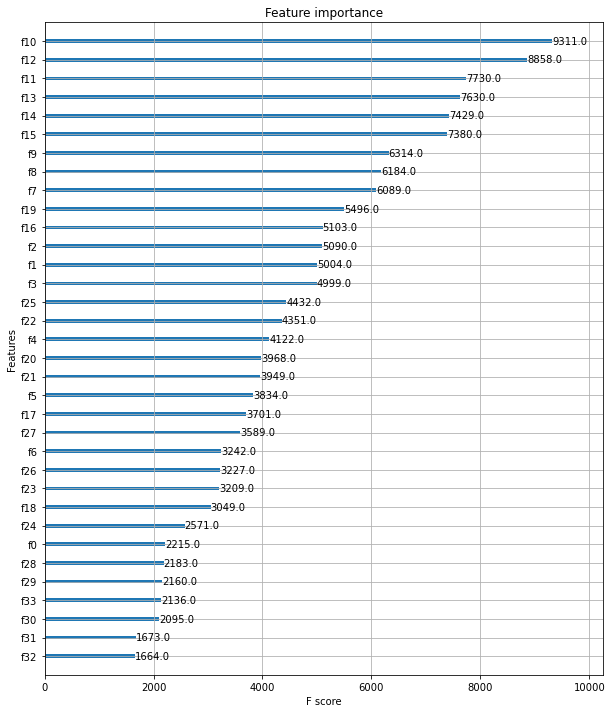

In [97]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

In [98]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr1 = dict()
tpr1 = dict()
roc_auc1 = dict()

#고친것
for i in range(10):
    fpr1[i], tpr1[i], _ = roc_curve(y_test1[:, i], pred[:, i])
    roc_auc1[i] = auc(fpr1[i], tpr1[i])
    
# 원래것
#for i in range(10):
#    fpr1[i], tpr1[i], _ = roc_curve(y_test1[:, i], XGBoost_pred_probs[:, i])
#    roc_auc1[i] = auc(fpr1[i], tpr1[i])

In [99]:
from itertools import cycle
n_classes = 10

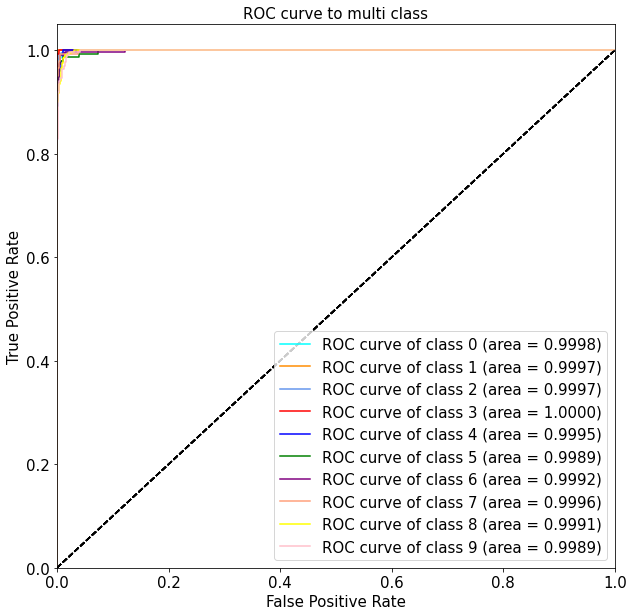

In [100]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr1[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr1[i], tpr1[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr1["macro"] = all_fpr
tpr1["macro"] = mean_tpr
roc_auc1["macro"] = auc(fpr1["macro"], tpr1["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 10))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'blue', 'green', 'purple', 'lightsalmon', 'yellow', 'pink'])
for i, color in zip(range(10), colors):
        plt.plot(fpr1[i], tpr1[i], color=color,
                 label='ROC curve of class {0} (area = {1:0.4f})'
                 ''.format(i, roc_auc1[i]))
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.xlabel('False Positive Rate', fontsize = 15)
        plt.ylabel('True Positive Rate', fontsize = 15)
        plt.title('ROC curve to multi class', fontsize = 15)
        plt.legend(loc="lower right", fontsize = 15)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
plt.show()

In [112]:
cv_xgb = xgb.cv(xgb_params, dtrain, num_boost_round = 20000, nfold=5, early_stopping_rounds = 10, as_pandas = True)

In [113]:
cv_xgb

,train-mlogloss-mean,train-mlogloss-std,test-mlogloss-mean,test-mlogloss-std
0,1.996198,0.001943,2.030199,0.002712
1,1.777617,0.003058,1.835388,0.003646
2,1.606120,0.002911,1.683059,0.003963
3,1.465401,0.002284,1.558159,0.004808
4,1.346071,0.003181,1.453345,0.006462
...,...,...,...,...
741,0.001103,0.000004,0.105525,0.004015
742,0.001102,0.000004,0.105527,0.004010
743,0.001101,0.000004,0.105523,0.004003
744,0.001100,0.000004,0.105522,0.003994


In [1]:
plt.figure(figsize=(10, 10))
plt.plot(cv_xgb.iloc[:,0])
plt.ylabel("mlogloss")
plt.xlabel("round")

NameError: name 'plt' is not defined